In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Plotting and fitting <a class='tocSkip'></a>
## A short guide <a class='tocSkip'></a>
## 0.1 - November 2019 <a class='tocSkip'></a>

> We illustrate plotting and fitting in Python by some examples.  
>
> Note, we will use functionality from the the module `nbi_stat` available from 
> [`https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik`](`https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik`).
> The code of that library is described in detail in the associated note available at the same location.   
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Simple plot of data

We start by creating 2 data-sets of $10\,000$ samples from the normal distribution - each with 

\begin{align*}
 d_1 &: \mu_1 = -\frac{1}{2}\quad\sigma_2=0.8 & d_2 &: \mu_2 = \frac{1}{2}\quad\sigma_2=1.3\quad.
\end{align*}

In [2]:
import numpy as np 

n  = 10000
d1 = np.random.normal(-1/2, 0.8, size=n)
d2 = np.random.normal( 1/2, 1.3, size=n)

Next, we want to histogram the data.  In both cases we want 100 bins between -5 and 5, so we create our 101 bin boundaries 

In [3]:
b,dx = np.linspace(-5,5,101,retstep=True)

Note that we request the bin-width back.  We will use that later on. 

We can now plot our histograms.  Here, we will use the function `nbi_stat.hist` to do that for us.  This automatically normalizes the histograms and plots them with uncertainties (as we should _always_ do)

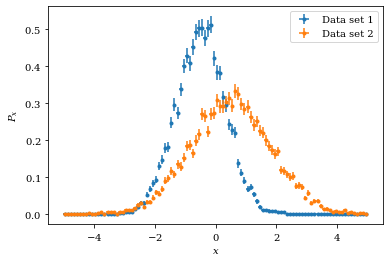

In [4]:
import sys
sys.path.append('../../statistics') #don't mind this!
import matplotlib.pyplot as plt 
import nbi_stat as nbi 

nbi.hist(d1,bins=b,fmt='.',ax=plt.gca(),label='Data set 1')
nbi.hist(d2,bins=b,fmt='.',ax=plt.gca(),label='Data set 2')
plt.xlabel(r'$x$')
plt.ylabel(r'$P_x$')
plt.legend();

We can also plot the data as a corner plot

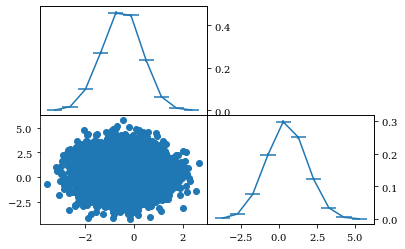

In [5]:
nbi.corner_plot(np.vstack((d1,d2)).T);

# Likelihood fit 

Let us perform a likelihood fit of a normal distribution 

$$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}\quad,$$ 

to our samples.  Again, we will use `nbi_stat.mle_fit` to do this for us.  For the $\log f$ expression we rely on _SciPy_'s `scipy.stat.norm.lpdf` function 

In [6]:
import scipy as sp 
import scipy.stats 

f = sp.stats.norm.logpdf
p1, cov1 = nbi.mle_fit(f,d1,[0,1],logpdf=True)
p2, cov2 = nbi.mle_fit(f,d2,(0,1),logpdf=True)

From each fit we get back the estimated parameter values and the covariance matrix of each fit.  The uncertainty on the fitted parameters are given by the square root of the diagonal elements of the covariance matrix 

$$ p_i \pm \delta_{p_i} = p_i \pm \sqrt{C_{ii}}\quad.$$ 

We will print out the results or our fits 

In [7]:
from IPython.core.display import display, Latex

names = ['\mu', '\sigma']
pretty = r'\\'.join([ f'\\mathrm{{Data set\ {t}}}' + r'\\' 
                     + r'\\'.join([nbi.format_result(pp,ee,name=nn,expo=None)
                                    for pp, ee, nn in zip(ps,np.sqrt(cov.diagonal()),names)])
                    for t,ps,cov in zip([1,2],[p1,p2],[cov1,cov2])])
                      
display(Latex('$'+pretty+'$'))

<IPython.core.display.Latex object>

Note, by default, uncertainties are rounded to 1 significant digit and the value given to the same precision. 

We can draw the confidence contours of the fits 

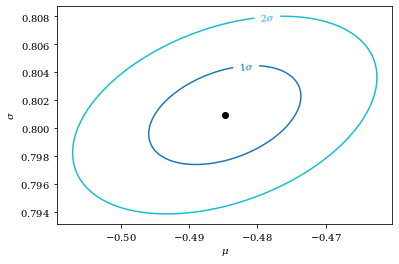

In [8]:
nbi.plot_nsigma_contour(p1,cov1,ns=[1,2],pnames=names)

## Plot of fit 

Next, we will plot our data and fits using the function `nbi_stat.fit_plot`.  Here, we need to generate histograms of our data first.   We will use the function `numpy.histogram` with option `density=False` 

In [9]:
n1, _ = np.histogram(d1,bins=b,density=False)
n2, _ = np.histogram(d2,bins=b,density=False)

The variables `n1` and `n2` now contains the count of values $x$ in each bin 

$$n_i = \sum_{b_{i}<x<b_{i+1}}\quad,$$ 

where $b_i,b_{i+1}$ are the bin boundaries and $n_i$ the number of values in that bin.

We want to normalise this to the intergral, so we calculate the normalised frequencies 

$$h_i = \frac{n_i}{\Delta_i N}\quad,$$

where $\Delta_i=|b_i-b_{i+1}|$ is the bin width, and $N$ is the total number of samples in the range $b_{0},b_{n}$.

In [10]:
w  = np.diff(b)
h1 = n1 / sum(n1) / w 
h2 = n2 / sum(n2) / w 

We want to plot the data at the mid-point of each bin given by 

$$x_i = \frac{b_{i}+b_{i+1}}{2}\quad,$$ 

and the uncertainties on each frequency is given by 

$$\delta_i = \frac{\sqrt{n_i}}{\Delta_i N}\quad.$$ 

In [11]:
c   = (b[:-1]+b[1:])/2
dh1 = np.sqrt(n1)/w/n1.sum()
dh2 = np.sqrt(n2)/w/n2.sum()

We are now finally ready to plot the data and the fits 

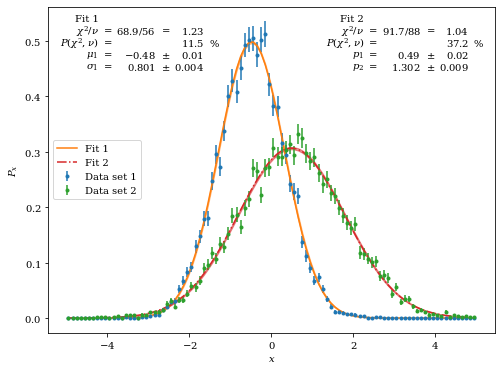

In [12]:
f = sp.stats.norm.pdf
plt.figure(figsize=(8,6))
nbi.fit_plot(c,h1,dh1,f,p1,cov1,
             parameters=[n+"_{1}" for n in names],
             band={'color':'tab:orange'},
             data={'fmt':'.','label':'Data set 1'},
             fit={'ls':'-','label':'Fit 1'},
             table={'loc':'upper left','title':'Fit 1'})
nbi.fit_plot(c,h2,dh2,f,p2,cov2,
             parameterss=[n+"_{2}" for n in names],
             band={'color':'tab:red'},
             data={'fmt':'.','label':'Data set 2'},
             fit={'ls':'-.','label':'Fit 2'},
             table={'title':'Fit 2'})
plt.xlabel('$x$')
plt.ylabel('$P_x$')
plt.legend(loc='center left');

Note, since these are likelihood fits, the calculated $\chi^2$ are not of much use, as they depend on the chosen binning so one must be careful when quoting that statistic. 

# A least-squares fit 

Next, we perform a least-squares ($\chi^2$) fit.  We will make some discontinuous data distributed as 

$$f(x;a,b,c,d,e) = a+bx+cx\sin(x)+dx^3+\begin{cases}
  e & x > 0\\
  0 & x \le 0\end{cases}\quad,$$ 
  
for $x\in[-1.25,1.25]$ and $a=-2,b=-2,c=1,d=2,e=\frac{1}{2}$.  Furthermore, we will add normally distributed noise at each point as 

$$n \sim \mathcal{N}[0,1/10]\quad.$$

In [13]:
def pdf(x,a,b,c,d,e):
    return a+b*x+c*x*np.sin(x)+d*x**3+e*(x > 0)

x = np.linspace(-1.25,1.25,51)
y = pdf(x,-2,-2,1,2,1/2) + np.random.normal(0,.1,size=x.shape)

Let us illustrate the data.  As uncertainty we will use the noise width of $1/10$

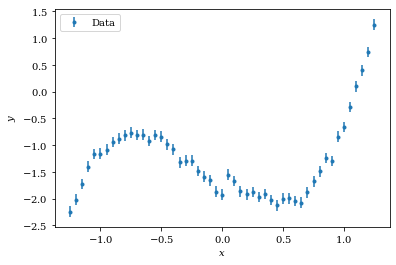

In [14]:
dy = np.full_like(x,0.1)
plt.errorbar(x,y,dy,fmt='.',label='Data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

We will fit the function $f$ to this data, but fixing $e=0$.  

In [15]:
f = lambda x,a,b,c,d : pdf(x,a,b,c,d,0)
names = [chr(ord('a')+i) for i in range(5)]
p, cov = nbi.curve_fit(f,x,y,(0,0,0,0),dy)

As before, we will plot the result 

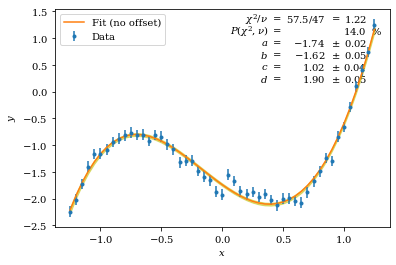

In [16]:
nbi.fit_plot(x,y,dy,f,p,cov,
             parameters=names[:-1],
             data={'fmt':'.','label':'Data'},
             fit={'label':'Fit (no offset)'})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

Let us now do the same fit, but leave $e$ as a free parameter, and we plot the result of both fits together.  

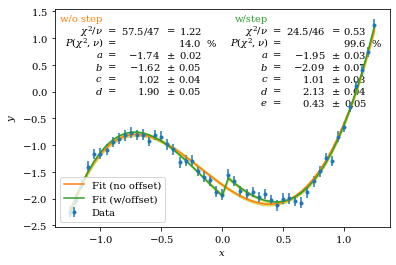

In [17]:
pg,covg = nbi.curve_fit(pdf,x,y,(0,0,0,0,0),dy)
nbi.fit_plot(x,y,dy,f,p,cov,
             parameters=names[:-1],
             data={'fmt':'.','label':'Data'},
             fit={'label':'Fit (no offset)',
                  'color':'C1'},
             table={'loc': 'upper left',
                    'title':{'label':r'w/o step',
                             'color':'C1'}})
nbi.fit_plot(x,y,dy,pdf,pg,covg,
             parameters=names,
             data={'fmt':'none','lw':0},
             fit={'label':'Fit (w/offset)','color':'C2'},
             table={'title':{'label':'w/step',
                             'color':'C2'}})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower left');

We plot all the confidence contours of our last fit 

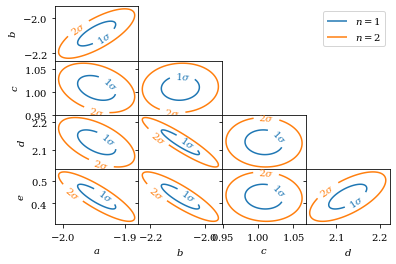

In [18]:
nbi.plot_nsigma_contour(pg,covg,ns=[1,2],
                        pnames=names,
                        legend=True,colors='auto',values=False)